# Experiment 1: Baselines

WANDB tag: `exp1`

In [1]:
import matplotlib.pyplot as plt
import wandb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set_context('paper')

In [2]:
api = wandb.Api(api_key="cc080145b244f97b7db093ba0e3de5088e7ee7aa")

In [3]:
runs = api.runs(path="acs-thesis-lb2027/gnn-baselines", include_sweeps=False, filters={"$and": [{"tags": {"$in": ["exp1"]}}, {"state": "finished"}, {"config.model": {"$ne":"HGT"}}]})

In [4]:
rows = []

for run in runs:
	row = {
		"model": run.config["model"],
		"dataset": run.config["dataset"],
		"test_accuracy": run.summary["test/accuracy"]
	}
	
	rows.append(row)

In [5]:
df = pd.DataFrame(rows)

In [6]:
df

,model,dataset,test_accuracy
0,GAT,IMDB,0.7648
1,GAT,IMDB,0.7964
2,GAT,IMDB,0.7640
3,GAT,IMDB,0.8160
4,GAT,IMDB,0.8690
...,...,...,...
221,DiagSheaf,DBLP,0.9540
222,DiagSheaf,DBLP,0.9640
223,DiagSheaf,DBLP,0.9580
224,DiagSheaf,DBLP,0.9700


<Axes: xlabel='model', ylabel='test_accuracy'>

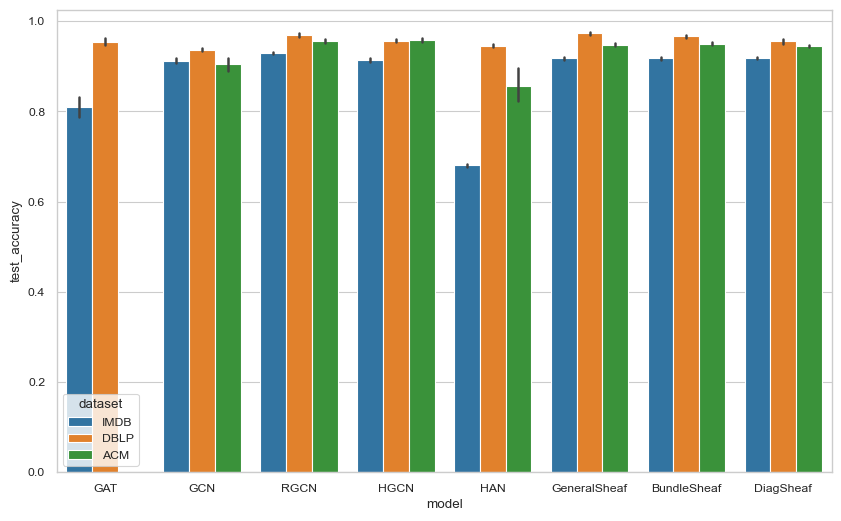

In [7]:
fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(111)

sns.barplot(df, x="model", y="test_accuracy", hue="dataset", ax=ax)

In [8]:
grouped = df.groupby(["model", "dataset"]).agg(["mean", "std", "max"])
grouped_mean = grouped["test_accuracy"]["mean"].unstack()
grouped_mean.style.format(precision=4).highlight_max(color='blue')

dataset,ACM,DBLP,IMDB
model,,,
BundleSheaf,0.9506,0.9672,0.9181
DiagSheaf,0.9454,0.9553,0.9191
GAT,nan,0.9551,0.8103
GCN,0.9046,0.9370,0.9127
GeneralSheaf,0.9485,0.9736,0.9179
HAN,0.8565,0.9458,0.6801
HGCN,0.9585,0.9570,0.9141
RGCN,0.9568,0.9696,0.9305


In [9]:
grouped_max = grouped["test_accuracy"]["max"].unstack()
grouped_max.style.format(precision=4).highlight_max(color='blue')

dataset,ACM,DBLP,IMDB
model,,,
BundleSheaf,0.9610,0.9750,0.9294
DiagSheaf,0.9510,0.9700,0.9258
GAT,nan,0.9760,0.8714
GCN,0.9300,0.9470,0.9244
GeneralSheaf,0.9550,0.9810,0.9264
HAN,0.9520,0.9550,0.6910
HGCN,0.9690,0.9640,0.9246
RGCN,0.9670,0.9810,0.9366


In [10]:
grouped_std = grouped["test_accuracy"]["std"].unstack()
grouped_std.style.format(precision=4)

dataset,ACM,DBLP,IMDB
model,,,
BundleSheaf,0.0065,0.0050,0.0061
DiagSheaf,0.0042,0.0086,0.0045
GAT,nan,0.0133,0.0380
GCN,0.0247,0.0058,0.0098
GeneralSheaf,0.0062,0.0050,0.0058
HAN,0.0633,0.0061,0.0052
HGCN,0.0063,0.0058,0.0079
RGCN,0.0084,0.0067,0.0036


In [11]:
df

,model,dataset,test_accuracy
0,GAT,IMDB,0.7648
1,GAT,IMDB,0.7964
2,GAT,IMDB,0.7640
3,GAT,IMDB,0.8160
4,GAT,IMDB,0.8690
...,...,...,...
221,DiagSheaf,DBLP,0.9540
222,DiagSheaf,DBLP,0.9640
223,DiagSheaf,DBLP,0.9580
224,DiagSheaf,DBLP,0.9700


In [31]:
final = grouped['test_accuracy'][['mean', 'std']]

In [36]:
def process_results(row):
    return f"{row['mean']:.4f}({row['std']:.4f})"
final['test_accuracy'] = final[['mean', 'std']].agg(process_results, axis=1)
final = final['test_accuracy'].unstack()

In [37]:
final

dataset,ACM,DBLP,IMDB
model,,,
BundleSheaf,0.9506(0.0065),0.9672(0.0050),0.9181(0.0061)
DiagSheaf,0.9454(0.0042),0.9553(0.0086),0.9191(0.0045)
GAT,NaN,0.9551(0.0133),0.8103(0.0380)
GCN,0.9046(0.0247),0.9370(0.0058),0.9127(0.0098)
GeneralSheaf,0.9485(0.0062),0.9736(0.0050),0.9179(0.0058)
HAN,0.8565(0.0633),0.9458(0.0061),0.6801(0.0052)
HGCN,0.9585(0.0063),0.9570(0.0058),0.9141(0.0079)
RGCN,0.9568(0.0084),0.9696(0.0067),0.9305(0.0036)


In [40]:
latex_table = final.style.to_latex(hrules=True, siunitx=True, column_format='lSSS')

In [44]:
with open("../tables/exp1.tex", "w+") as f:
    f.write(latex_table)